<a href="https://colab.research.google.com/github/lmdss1294/My_section1_project/blob/main/%EC%84%A0%ED%98%95%EB%B0%A9%EC%A0%95%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 다운로드 및 DataFrame으로 읽어오기
url = 'https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv'
df = pd.read_csv(url)
df = df.groupby('Name').apply(lambda x: x.fillna(method='ffill'))

# 결측치가 있는 데이터 drop
df = df.dropna()
def convert_sales(s):
    if s[-1] == 'K':
        return float(s[:-1]) * 0.001
    elif s[-1] == 'M':
        return float(s[:-1])
    else:
        return float(s)

df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales)
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales)
df["Total_Sales"]=df["NA_Sales"]+df["EU_Sales"]+df["JP_Sales"]+df["Other_Sales"]
def convert_years(y):
    if y<=1970:
      if y <=20:
        return int(y+2000)
      elif y> 20:
        return int(y+1900)
    else:
      return int(y)
df['Year'] = df['Year'].apply(convert_years)
# 데이터 타입 확인하기
print(df.dtypes)



Unnamed: 0       int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object


In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genres,Comp
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,[Action],Nintendo
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,[Action],Nintendo
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,[Adventure],Sony
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,[Misc],Nintendo
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,[Platform],Sony
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,[Platform],Nintendo
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,[Action],Sony
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,[Sports],Sony
16596,16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,[Action],Sony


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16322 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16322 non-null  int64  
 1   Name         16322 non-null  object 
 2   Platform     16322 non-null  object 
 3   Year         16322 non-null  int64  
 4   Genre        16322 non-null  object 
 5   Publisher    16322 non-null  object 
 6   NA_Sales     16322 non-null  float64
 7   EU_Sales     16322 non-null  float64
 8   JP_Sales     16322 non-null  float64
 9   Other_Sales  16322 non-null  float64
 10  Total_Sales  16322 non-null  float64
 11  Genres       16322 non-null  object 
 12  Comp         16322 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16322.000000,16322.000000,16322.000000,16322.000000,16322.000000,16322.000000,16322.000000
mean,8304.863681,2006.409080,0.265483,0.147322,0.077999,0.048254,0.539058
std,4793.144010,5.827344,0.821438,0.507533,0.308606,0.189361,1.561110
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4158.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8301.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12455.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16598.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
idx = df[df['Year'] < 2000].index
df.drop(idx , inplace=True)





In [ ]:
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Genres,Comp
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,[Action],Nintendo
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,[Action],Nintendo
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,[Adventure],Sony
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,[Misc],Nintendo
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,[Platform],Sony
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16592,16593,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02,[Misc],Sony
16593,16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,[Platform],Nintendo
16594,16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,[Action],Sony
16595,16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,[Sports],Sony


In [ ]:
company_dict = {'DS': 'Nintendo', 'Wii': 'Nintendo', 'PSP': 'Sony', 'PS3': 'Sony', 'PC': 'PC', 
                'PS': 'Sony', 'GBA': 'Nintendo', 'PS4': 'Sony', 'PS2': 'Sony', 'XB': 'Microsoft', 
                'X360': 'Microsoft', 'GC': 'Nintendo', '3DS': 'Nintendo', 'SAT': 'Sega',
                'GB': 'Nintendo', 'NES': 'Nintendo', 'DC': 'Sega', 'N64': 'Nintendo', 'XOne': 'Microsoft',
                'SNES': 'Nintendo', 'WiiU': 'Nintendo', 'PSV': 'Sony', 'GEN': 'Sega', 'SCD': 'Sega',
                'WS': 'Bandai', 'NG': 'SNK', 'TG16': 'NEC', '3DO': 'Panasonic', 'GG': 'Sega', 'PCFX': 'NEC'}
df['Comp'] = df['Platform'].map(company_dict)



In [ ]:
import pandas as pd
import numpy as np

def filter_csv(url, column, string_value):
    # CSV 파일을 불러옵니다
    df = pd.read_csv(url)
    # 특정 column에서 원하는 문자열 값을 가진 행에 1을 저장하고, 그렇지 않은 행은 0으로 변환합니다
    filtered_data = np.where(df[column] == string_value, 1, 0)
    # 변환된 데이터를 행렬 형태로 반환합니다
    return filtered_data

In [ ]:
column = 'Genre'
string_value = 'Action'
filtered_data = filter_csv(url, column, string_value)
print(filtered_data)

[1 1 0 ... 0 1 0]


In [ ]:
A = pd.pivot_table(df, values='NA_Sales', index='Comp', columns='Genre', aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0)

# 만든 행렬을 출력합니다
print(A)

Genre      Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Comp                                                                     
Atari           1          1         1     1         1       1       1   
Bandai          0          0         0     0         0       0       0   
Microsoft       1          1         1     1         1       1       1   
NEC             0          1         0     0         0       0       0   
Nintendo        1          1         1     1         1       1       1   
PC              1          1         1     1         1       1       1   
Panasonic       0          1         0     0         0       1       0   
SNK             0          0         1     0         0       0       0   
Sega            1          1         1     1         1       1       1   
Sony            1          1         1     1         1       1       1   

Genre      Role-Playing  Shooter  Simulation  Sports  Strategy  
Comp                                          

In [ ]:
import pandas as pd

# CSV 파일을 불러옵니다
url = 'https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv'
df = pd.read_csv(url)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 다운로드 및 DataFrame으로 읽어오기
url = 'https://raw.githubusercontent.com/lmdss1294/My_section1_project/main/vgames2.csv'
df = pd.read_csv(url)
df = df.groupby('Name').apply(lambda x: x.fillna(method='ffill'))

# 결측치가 있는 데이터 drop
df = df.dropna()
def convert_sales(s):
    if s[-1] == 'K':
        return float(s[:-1]) * 0.001
    elif s[-1] == 'M':
        return float(s[:-1])
    else:
        return float(s)

df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
df['Other_Sales'] = df['Other_Sales'].apply(convert_sales)
df['JP_Sales'] = df['JP_Sales'].apply(convert_sales)
df["Total_Sales"]=df["NA_Sales"]+df["EU_Sales"]+df["JP_Sales"]+df["Other_Sales"]
def convert_years(y):
    if y<=1970:
      if y <=20:
        return int(y+2000)
      elif y> 20:
        return int(y+1900)
    else:
      return int(y)
df['Year'] = df['Year'].apply(convert_years)


idx = df[df['Year'] < 2000].index
df.drop(idx , inplace=True)

separator = ';'

# 각 게임의 장르를 분리하여 리스트로 저장합니다.
df['Genres'] = df['Genre'].str.split(separator)

# A 행렬의 column index를 Comp로 하고 A의 원소값은 게임사별 장르의 총 개수로 합니다.
company_dict = {'DS': 'Nintendo', 'Wii': 'Nintendo', 'PSP': 'Sony', 'PS3': 'Sony', 'PC': 'PC',
                'PS': 'Sony', 'GBA': 'Nintendo', 'PS4': 'Sony', 'PS2': 'Sony', 'XB': 'Microsoft',
                'X360': 'Microsoft', 'GC': 'Nintendo', '3DS': 'Nintendo', 'SAT': 'Sega',
                'GB': 'Nintendo', 'NES': 'Nintendo', 'DC': 'Sega', 'N64': 'Nintendo', 'XOne': 'Microsoft',
                'SNES': 'Nintendo', 'WiiU': 'Nintendo', 'PSV': 'Sony', 'GEN': 'Sega', 'SCD': 'Sega',
                'WS': 'Bandai', '3DO': 'Panasonic', 'GG': 'Sega', }
df['Comp'] = df['Platform'].map(company_dict)
# 게임사별 장르 개수를 저장할 딕셔너리를 생성합니다.
company_genre_counts = {}
for company in company_dict.values():
    company_genre_counts[company] = {}

# 각 게임사별로 장르 개수를 계산합니다.
for i, row in df.iterrows():
    genres = row['Genres']
    company = row['Comp']
    if company not in company_dict.values():
        continue
    if company not in company_genre_counts:
        company_genre_counts[company] = {}
    for genre in genres:
        if genre not in company_genre_counts[company]:
            company_genre_counts[company][genre] = 0
        company_genre_counts[company][genre] += 1

# A 행렬을 생성합니다.
genres = sorted(set(df['Genre']))
companies = sorted(set(company_dict.values()))
A = np.zeros((len(companies), len(genres)))
for i, company in enumerate(companies):
    if company not in company_genre_counts:
        continue
    for j, genre in enumerate(genres):
        if genre in company_genre_counts[company]:
            A[i][j] = company_genre_counts[company][genre]

<ipython-input-42-063d502169c6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NA_Sales'] = df['NA_Sales'].apply(convert_sales)
<ipython-input-42-063d502169c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EU_Sales'] = df['EU_Sales'].apply(convert_sales)
<ipython-input-42-063d502169c6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
A = np.array(A)

In [ ]:
A

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00],
       [5.420e+02, 8.500e+01, 1.150e+02, 1.850e+02, 7.700e+01, 1.400e+01,
        2.420e+02, 1.120e+02, 3.600e+02, 6.300e+01, 4.180e+02, 5.100e+01],
       [1.087e+03, 4.170e+02, 1.660e+02, 8.580e+02, 4.160e+02, 3.680e+02,
        3.070e+02, 4.330e+02, 2.100e+02, 4.240e+02, 6.540e+02, 1.550e+02],
       [1.560e+02, 6.100e+01, 4.000e+00, 2.000e+01, 1.100e+01, 2.500e+01,
        5.600e+01, 1.010e+02, 1.440e+02, 1.080e+02, 4.800e+01, 1.700e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.000e+00, 8.000e+00, 7.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00],
       [1.243e+03, 6.010e+02, 3.470e+02, 5.040e+02, 2.110e+02, 7.300e+01,
        4.300e+02, 6.350e+02, 4.

In [ ]:
A = A.transpose()

In [ ]:
A_df = pd.DataFrame(A, columns=list(companies), index=list(genres))

In [ ]:
A_df = A_df.astype("int")

In [ ]:
A_df

,Bandai,Microsoft,Nintendo,PC,Panasonic,Sega,Sony
Action,0,542,1087,156,0,2,1243
Adventure,0,85,417,61,0,8,601
Fighting,0,115,166,4,0,7,347
Misc,0,185,858,20,0,0,504
Platform,0,77,416,11,0,1,211
Puzzle,0,14,368,25,0,0,73
Racing,0,242,307,56,0,3,430
Role-Playing,2,112,433,101,0,4,635
Shooter,0,360,210,144,0,2,409
Simulation,0,63,424,108,0,0,163


In [ ]:
A_df = A_df.drop(labels="Panasonic",axis=1)

In [ ]:
b = df.groupby(['Comp', 'Genre'])['Total_Sales'].sum().unstack(fill_value=0)

In [ ]:
b.transpose()

Comp,Bandai,Microsoft,Nintendo,PC,Sega,Sony
Genre,,,,,,
Action,0.00,323.11,409.14,25.51,1.18,773.21
Adventure,0.00,20.72,90.12,3.99,1.16,68.54
Fighting,0.00,52.23,72.90,0.13,0.78,186.84
Misc,0.00,105.80,417.50,4.08,0.00,183.92
Platform,0.00,21.80,337.69,0.47,0.12,136.89
Puzzle,0.00,1.28,124.39,0.93,0.00,13.13
Racing,0.00,105.20,165.30,3.81,2.01,289.70
Role-Playing,0.76,94.94,296.32,45.59,0.68,265.54
Shooter,0.00,392.01,59.64,35.52,0.07,413.08


In [ ]:
A_df=np.array(A_df)
b = np.array(b)


In [ ]:
x = np.linalg.pinv(A_df).dot(b.transpose())

In [ ]:
x = x.transpose()

XT를 구한다음 전역 탐색을 통해 최소화 값을 찾음.


In [ ]:
x.shape

(6, 7)

In [ ]:
x

array([[ 2.57737031e-01, -2.66773813e-04, -8.68311170e-05,
        -8.40385737e-04, -8.23607112e-18, -4.01336723e-03,
         3.31750258e-04],
       [ 3.25971276e-01,  8.88696254e-01, -5.31008249e-02,
         2.91936217e-01,  2.12018853e-15,  9.85091620e-01,
        -1.11827755e-01],
       [ 1.03860541e+02,  6.06531800e-01,  6.47831867e-01,
        -1.14560216e+00,  1.65456027e-14,  8.16732047e+00,
        -3.49966603e-01],
       [ 4.30411901e+00, -4.09160593e-03,  5.87872877e-03,
         2.24104265e-01,  2.27662839e-17,  1.88701201e-03,
        -6.39707262e-03],
       [ 2.82269680e-02,  1.25924256e-03, -4.25335933e-04,
        -1.90532193e-03,  2.05803681e-16,  1.01768657e-01,
         8.94789995e-04],
       [ 2.44239698e+01,  1.10679593e+00, -9.04765138e-02,
        -3.36820930e-01, -1.52178909e-14, -7.55509899e+00,
         2.42736281e-01]])

In [ ]:
x

array([[ 2.57737031e-01, -2.66773813e-04, -8.68311170e-05,
        -8.40385737e-04, -8.23607112e-18, -4.01336723e-03,
         3.31750258e-04],
       [ 3.25971276e-01,  8.88696254e-01, -5.31008249e-02,
         2.91936217e-01,  2.12018853e-15,  9.85091620e-01,
        -1.11827755e-01],
       [ 1.03860541e+02,  6.06531800e-01,  6.47831867e-01,
        -1.14560216e+00,  1.65456027e-14,  8.16732047e+00,
        -3.49966603e-01],
       [ 4.30411901e+00, -4.09160593e-03,  5.87872877e-03,
         2.24104265e-01,  2.27662839e-17,  1.88701201e-03,
        -6.39707262e-03],
       [ 2.82269680e-02,  1.25924256e-03, -4.25335933e-04,
        -1.90532193e-03,  2.05803681e-16,  1.01768657e-01,
         8.94789995e-04],
       [ 2.44239698e+01,  1.10679593e+00, -9.04765138e-02,
        -3.36820930e-01, -1.52178909e-14, -7.55509899e+00,
         2.42736281e-01]])

In [ ]:
A_df.transpose().shape

(12, 7)

In [ ]:
Test_matrix = np.zeros((12, 7))

In [ ]:
Norm = 0
a = 0
b = 0

for i in range(12):
  for j in range(6):
    Test_matrix = np.full((12, 6),10)
    Test_matrix[i, j] = 10000
    Test = Test_matrix @ x


    if Norm < np.linalg.norm(Test):
      Norm = np.linalg.norm(Test)
      a = i
      b = j
      
print(a,b)


0 2


In [ ]:
##닌텐도의 액션 게임을 출시하는 것이 유리하다.

In [ ]:
A_df

array([[   0,  542, 1087,  156,    0,    2, 1243],
       [   0,   85,  417,   61,    0,    8,  601],
       [   0,  115,  166,    4,    0,    7,  347],
       [   0,  185,  858,   20,    0,    0,  504],
       [   0,   77,  416,   11,    0,    1,  211],
       [   0,   14,  368,   25,    0,    0,   73],
       [   0,  242,  307,   56,    0,    3,  430],
       [   2,  112,  433,  101,    0,    4,  635],
       [   0,  360,  210,  144,    0,    2,  409],
       [   0,   63,  424,  108,    0,    0,  163],
       [   0,  418,  654,   48,    0,    4,  867],
       [   2,   51,  155,  170,    0,    0,  171]])

In [ ]:
B = df[df["Genre"]=="Action"]

In [ ]:
B = B[["Total_Sales","Comp"]]

In [ ]:
B

,Total_Sales,Comp
0,0.04,Nintendo
1,0.18,Nintendo
7,0.19,Sony
9,0.08,Sony
15,0.36,Sony
...,...,...
16575,1.08,PC
16581,0.27,Microsoft
16583,1.43,Nintendo
16594,0.01,Sony


In [ ]:
C =B.groupby("Comp").sum()

In [ ]:
C

,Total_Sales
Comp,
Microsoft,323.11
Nintendo,409.14
PC,25.51
Sega,1.18
Sony,773.21


In [ ]:
A_df = A_df.drop(labels="Bandai",axis=1)

In [ ]:
D = A_df.loc["Action"]

In [ ]:
D= D.to_frame()

AttributeError: ignored

In [ ]:
D

,Action
Microsoft,542
Nintendo,1087
PC,156
Sega,2
Sony,1243


In [ ]:
D =D.rename(columns={'Action':"Total_Sales"})
D

,Total_Sales
Microsoft,542
Nintendo,1087
PC,156
Sega,2
Sony,1243


In [ ]:
C.index

Index(['Microsoft', 'Nintendo', 'PC', 'Sega', 'Sony'], dtype='object', name='Comp')

In [ ]:
C

,Total_Sales
Comp,
Microsoft,323.11
Nintendo,409.14
PC,25.51
Sega,1.18
Sony,773.21


In [ ]:
E = C.div(D)

In [ ]:
E

,Total_Sales
Comp,
Microsoft,0.596144
Nintendo,0.376394
PC,0.163526
Sega,0.590000
Sony,0.622051


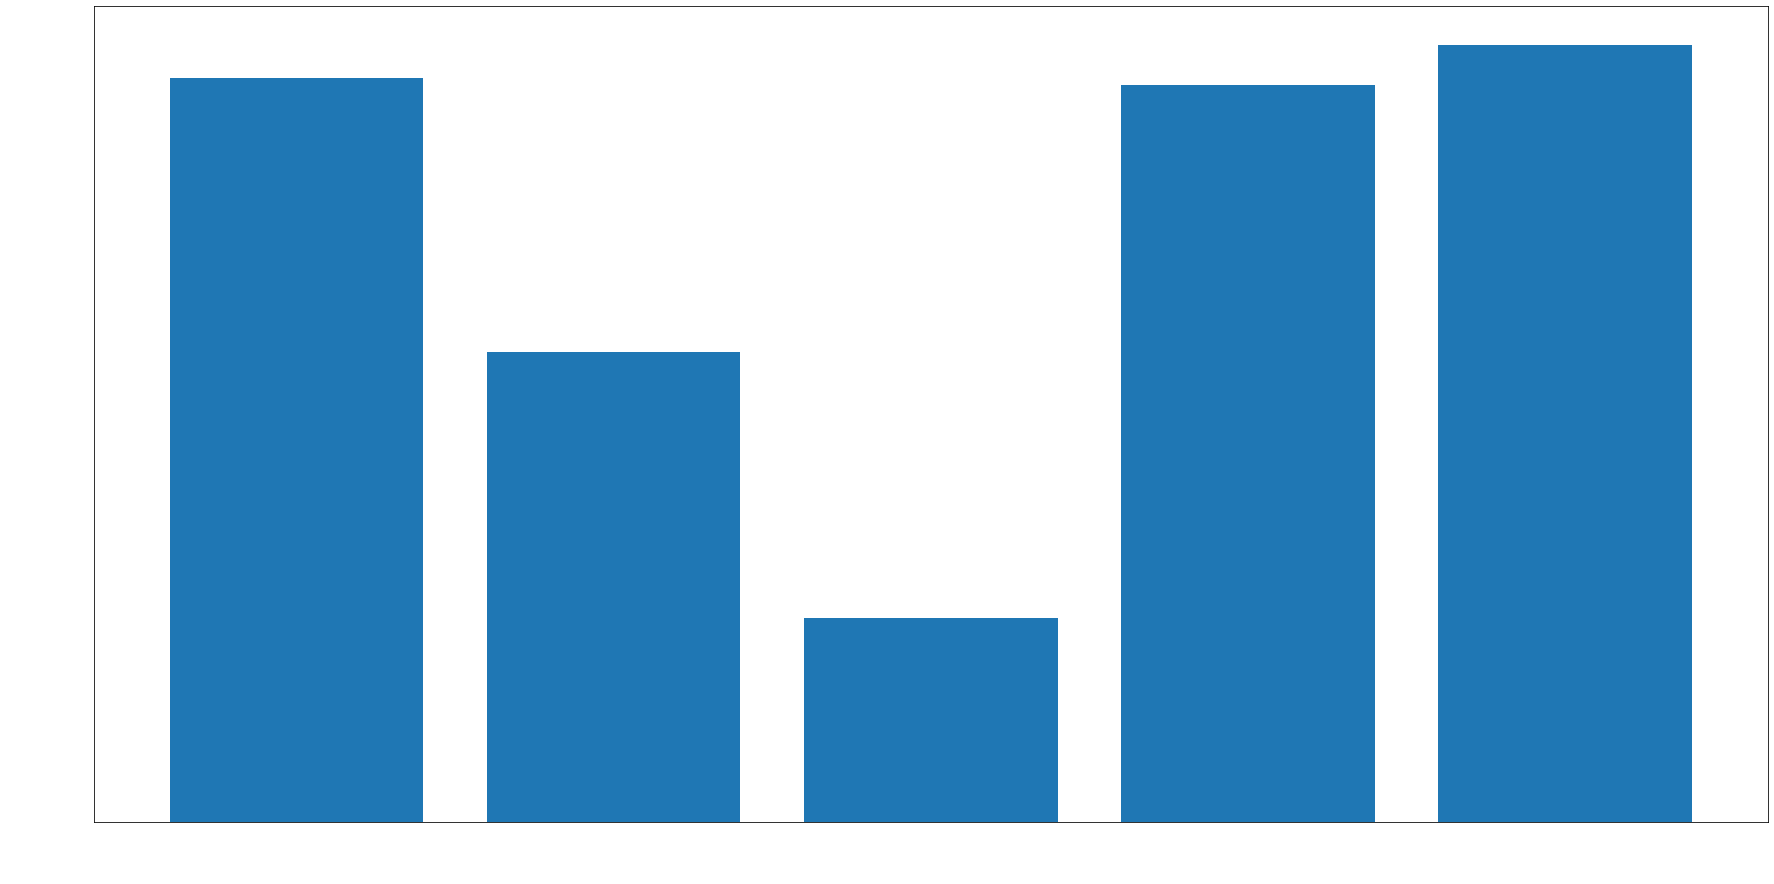

In [ ]:
plt.rcParams.update({'text.color': "White",
                     'axes.labelcolor': "White",'legend.labelcolor': 'black','xtick.color': 'white','ytick.color': 'white'})
plt.figure(figsize=(30,15))
x = ['Microsoft', 'Nintendo', 'PC', 'Sega', 'Sony']
plt.bar(x,E["Total_Sales"])
plt.rc('font', size=50)      